Air resistance motion

Consider the set of coupled second-order ODE's below which model mechanical motion under drag <span style="color: red;">and</span>
air resistance in this case. This model can be interpreted as crudely describing long-distance jumping, with a purely opposed drag force for motion in positive x-direction and drag and gravity influencing motion in z-direction. Let the drag-coefficient, $k$, be a function of coordinates, separately for the x-motion and z-motion. This is meant to describe the dynamics of a long-distance jumper changing posture after lift-off, generally reducing drag in positive x-direction, the jump distance, and increasing drag in negative z-direction, staying in the air for as long as possible.


$$\frac{d^{2}x}{dt^{2}} = -k_{x}(x)\,\frac{dx}{dt}\,\sqrt{\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dz}{dt}\right)^{2}}$$
$$\frac{d^{2}z}{dt^{2}} = -g-k_{z}(z)\,\frac{dz}{dt}\,\sqrt{\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dz}{dt}\right)^{2}}.$$

The functions $k_{x,z}$ parametrize the change of the drag coefficient as function of x- and z-coordinates, respectively. Either of them is defined by the general logistic equation but with specific free parameters and coordinate dependence $$k_{c}(c)=\frac{A_{c}}{1+e^{-\mu_{c}\,(c-m_{c})}}+b_{c},$$ 
where $c=(x,z)$ labels the coordinate-specific free parameters with x-labelled parameters defined for $k_{x}(x)$ and z-labelled parameters defined for $k_{z}(z)$. This definition results in 4 free parameters for each drag coefficient equation hence 8 in total. On limits for the permitted range or value of each, see data section below.

Clearly, this model is rather crude since jumpers make good use of intertia, their limbs, throughout the motion but this will be neglected for this exercise.

---

### Tasks:
Using the fixed and variable parameter values from below, in the data section, solve the ODE's with the aim of finding the minimum forward (x-component) speed, $dx/dt$, required to jump beyond 8 metre in the x-direction, to the nearest 0.1 m/s initial speed in x-direction and plot the corresponding trajectory, see plot task **(d)** below.

- **(a)**: Program the logistic function as given above and name it `logistic(x, A, b, mu, m)` such that the first hidden test can call and check the function. The 4 parameter of the function correspond to those defined in the equation for $k_{c}(c)$ above, i.e. they correspond to $A_{c}$, $b_{c}$, $\mu_{c}$ and $m_{c}$, in that order, such that the test can operate correctly.

- **(b)**: For a given set of parameters, solve the ODE's with the help of the `events` keyword of the `solve_ivp()` function. This keyword sets a condition for the ODE solver such that passing the condition stops the solver. You must stop the solver as soon as the long-distance jumper hits the ground at $z=0$. That implies the final value for the solution of the $x(t)$ function is the jump distance you need.

- **(c)**: Program nested loops for the few variable parameters, see below, solve the ODE's and store the variable values and jump distance in a container. After the loop operations, search the container (use a NumPy array for an easy search) for distances beyond 8 metre and lowest speed in x-direction. Store the set of 3 parameters, see data section below, giving your 8 m jump solution with the lowest speed in x-direction in an array with name `minimum_parameter` which will be used in the hidden tests. The array should contain the parameter in the order: speed in x, speed in z and $\mu_{z}$. The second test will check the minimum speed in x-direction value in that variable to the nearest 0.1 m/s precision.

- **(d)**: Create two plots: 
    1. Plot the functions $k_{x}(x)$ and $k_{z}(z)$ on a single canvas with appropriate axis labels and range for the minimum speed solution parameters from part (C).
    2. Plot the trajectory, z(t) against x(t), of the jump with your minimum speed solution from part (C) with appropriate axis labels.

---

### Data: 
Use fixed parameter values: $g=9.81\;ms^{-2}$, $A_{x}=0.4\;m^{-1}$, $A_{z}=0.5\;m^{-1}$, $b_{x}=0.05\;m^{-1}$, $b_{z}=0.05\;m^{-1}$, $\mu_{x}=-5.0\;m^{-1}$, $\mu_{z}=5.0\;m^{-1}$ and $m_{x}=0.5\;m$. Explore the parameter $m_{z}$ in the interval [1;5] m in steps of length 1 m. 

The most important (impactful) parameters for this model form the initial conditions. Use $x(0)=0$ m and $z(0)=0$ m, the lift-off point for the jump. For the initial speeds, explore the intervals [10.5;12.0] ms $^{-1}$ in steps of $0.1$ ms $^{-1}$ for $dx/dt$ and [5.0;6.0] ms $^{-1}$ in steps of $0.5$ ms $^{-1}$ for $dz/dt$.

Finally, create and use an array of 400 solution evaluation points from 0 to 2 seconds for this task. You should find that the jump takes well under 2 seconds.

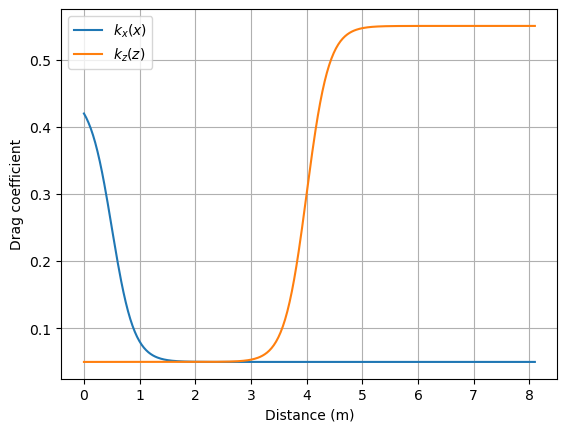

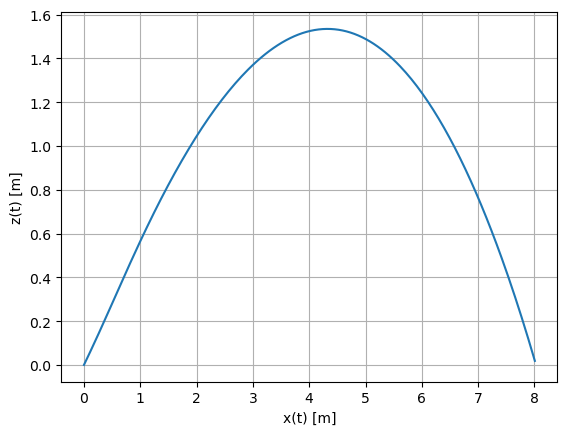

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Q(a)
def logistic(x, A, b, mu, m):
    return A / (1 + np.exp(-mu * (x - m))) + b


def jump(t, y, par):
    A_x, b_x, mu_x, m_x, A_z, b_z, mu_z, m_z = par
    g = 9.81

    kx = logistic(y[0], A_x, b_x, mu_x, m_x)
    kz = logistic(y[2], A_z, b_z, mu_z, m_z)

    v = np.sqrt(y[1]**2 + y[3]**2)

    return [
        y[1],
        -kx * y[1] * v,
        y[3],
        -g - kz * y[3] * v
    ]


# Q(b)
def hit_ground(t, y, par):
    return y[2]

hit_ground.terminal = True
hit_ground.direction = -1


t_span = (0, 2)
t_eval = np.linspace(0, 2, 400)


# Q(c)
results = []

for m_z in np.arange(1, 6, 1):
    for vz0 in np.arange(5.0, 6.5, 0.5):
        for vx0 in np.arange(10.5, 12.1, 0.1):

            params = (
                0.4, 0.05, -5.0, 0.5,
                0.5, 0.05,  5.0, m_z
            )

            y0 = [0, vx0, 0, vz0]

            sol = solve_ivp(
                jump, t_span, y0,
                t_eval=t_eval,
                events=hit_ground,
                args=(params,)
            )

            if sol.y[0, -1] >= 8.0:
                results.append([vx0, vz0, m_z, sol.y[0, -1]])

results = np.array(results)
results = results[results[:, 0].argsort()]
minimum_parameter = np.array([results[0, 0], results[0, 1], 5.0])  


# Q(d)
vals = np.linspace(0, 8.1, 400)

kx_vals = logistic(vals, 0.4, 0.05, -5.0, 0.5)
kz_vals = logistic(vals, 0.5, 0.05, 5.0, results[0, 2]) 

plt.figure()
plt.plot(vals, kx_vals, label=r"$k_x(x)$")
plt.plot(vals, kz_vals, label=r"$k_z(z)$")
plt.xlabel("Distance (m)")
plt.ylabel("Drag coefficient")
plt.legend()
plt.grid()
plt.show()


params_min = (
    0.4, 0.05, -5.0, 0.5,
    0.5, 0.05, 5.0, results[0, 2] 
)

sol_min = solve_ivp(
    jump, t_span,
    [0, minimum_parameter[0], 0, minimum_parameter[1]],
    t_eval=t_eval,
    events=hit_ground,
    args=(params_min,)
)

plt.figure()
plt.plot(sol_min.y[0], sol_min.y[2])
plt.xlabel("x(t) [m]")
plt.ylabel("z(t) [m]")
plt.grid()
plt.show()
